# **Learning**

In [1]:
TRAINING_SET_FEATURES = "../01_data/train/under_educated_features.csv"
TRAINING_SET_LABELS = "../01_data/train/under_educated_labels.csv"

MODEL_NAME = "under_educated"

In [2]:
import pandas as pd
import numpy as np

from tensorflow import keras
import tensorflow as tf

/home/madbiker/miniconda3/envs/xai/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/madbiker/miniconda3/envs/xai/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/madbiker/miniconda3/envs/xai/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/madbiker/miniconda3/envs/xai/lib/python3

## **Loading training dataset**

In [3]:
X = np.loadtxt(TRAINING_SET_FEATURES, delimiter=",")
y = np.loadtxt(TRAINING_SET_LABELS, delimiter=",")

## **Training a neural network**

In [4]:
import neural_network
from importlib import reload
reload(neural_network)

model = neural_network.create_model(X)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [5]:
opt = keras.optimizers.Adam(learning_rate=0.0025)
model.compile(optimizer=opt, loss="mae")
history = model.fit(X, y, validation_split=0.25, epochs=1000, batch_size=1000)

Train on 14060 samples, validate on 4687 samples
Epoch 1/1000
14060/14060 [==============================] - 0s 18us/sample - loss: 0.2131 - val_loss: 0.1368
Epoch 2/1000
14060/14060 [==============================] - 0s 7us/sample - loss: 0.1193 - val_loss: 0.1139
Epoch 3/1000
14060/14060 [==============================] - 0s 6us/sample - loss: 0.1058 - val_loss: 0.1085
Epoch 4/1000
14060/14060 [==============================] - 0s 7us/sample - loss: 0.1023 - val_loss: 0.1059
Epoch 5/1000
14060/14060 [==============================] - 0s 6us/sample - loss: 0.0989 - val_loss: 0.1092
Epoch 6/1000
14060/14060 [==============================] - 0s 7us/sample - loss: 0.0994 - val_loss: 0.1026
Epoch 7/1000
14060/14060 [==============================] - 0s 6us/sample - loss: 0.0979 - val_loss: 0.1042
Epoch 8/1000
14060/14060 [==============================] - 0s 6us/sample - loss: 0.0971 - val_loss: 0.1034
Epoch 9/1000
14060/14060 [==============================] - 0s 5us/sample - loss: 0.09

In [6]:
import matplotlib.pyplot as plt

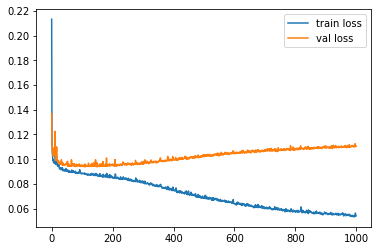

In [7]:
plt.plot(history.history["loss"], label="train loss")
plt.plot(history.history["val_loss"], label="val loss")
plt.legend()

## **Saving the model**

In [8]:
model.save_weights("../03_models/"+MODEL_NAME+"/")